In [471]:
import matplotlib.pyplot as plt
import numpy as np

In [472]:
# class Volume:
#     def __init__(self) -> None:
#         pass

def read_volume(name: str, is_complex = False):
    dim = [0,0,0]
    data_raw = []
    with open(f"./{name}.volume","r") as f:
        dim = [int(d) for d in f.readline().split(",")]
        if is_complex:
            data_raw = [complex(x.replace("i","j")) for x in f.readlines()]
        else:
            data_raw = [float(x) for x in f.readlines()]
    data = np.array([
        [
            [
                data_raw[i0 + i1 * dim[0] + i2 * dim[0]*dim[1]]
                for i2 in range(dim[2])
            ] for i1 in range(dim[1])
        ] for i0 in range(dim[0])
    ])
    return (dim, data)

def read_spectra(name: str):
    spectra = []
    with open(f"./{name}.spectra","r") as f:
        v_ion_ion = float(f.readline())
        spectra = np.array([float(x) for x in f.readlines()])
        return (v_ion_ion, spectra)

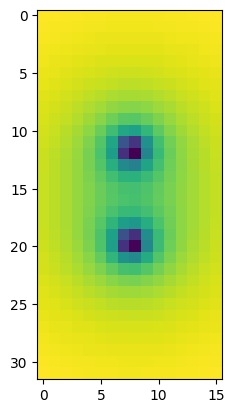

In [473]:
dim, volume = read_volume("electric_potential", is_complex=True)

plt.imshow(volume[:,:,8].real)

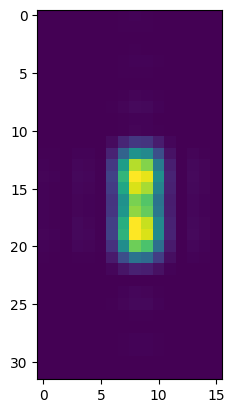

In [474]:
dim, volume = read_volume("h2_exp/6")

plt.imshow(volume[:,:,8], vmax=0.02)


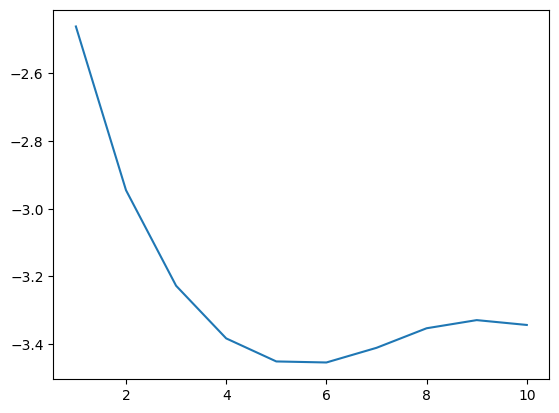

In [475]:
def read_energy_total(i):
    v_ion_ion, spectra = read_spectra(f"h2_exp/{i}")
    # return spectra[0]
    return v_ion_ion + spectra[0] + spectra[1]


e = [
    read_energy_total(i+1) for i in range(0,10)
]

# plt.plot(np.arange(1,11)/10 * 1.5 + 0.5, e)
plt.plot(np.arange(1,11), e)

